# Part 1: Working with Regex

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

In [0]:
zip_code_pattern = r"\d{5}"
text_to_search = "I moved to Paris 75011, it's closer to my workplace."
re.findall(zip_code_pattern, text_to_search)

['75011']

In [0]:
date_pattern = r"\d{2}-\d{2}-\d{4}"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(date_pattern, text_to_search)

['15-02-2017']

In [0]:
with open('data/receipts.txt', encoding="utf-8") as doc:
    text = doc.read();

In [0]:
quantity_pattern = r"Quantity +\d+"
re.findall(quantity_pattern, text)[0:5]

['Quantity                         163',
 'Quantity                         110',
 'Quantity                         156',
 'Quantity                         182',
 'Quantity                          97']

In [0]:
amount_pattern = r"Total Amount +\d+.\d{2} €"
re.findall(amount_pattern, text)[0:5]

['Total Amount               3097.00 €',
 'Total Amount                935.00 €',
 'Total Amount               2808.00 €',
 'Total Amount               4368.00 €',
 'Total Amount               1988.50 €']

In [0]:
quantity_group_pattern = r"Quantity +(\d+)"
re.findall(quantity_group_pattern, text)[0:5]

['163', '110', '156', '182', '97']

In [0]:
amount_group_pattern = r"Total Amount +(\d+.\d{2}) €"
re.findall(amount_group_pattern, text)[0:5]

['3097.00', '935.00', '2808.00', '4368.00', '1988.50']

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-2.0.2
collecting ... collected 6 items

tests/test_patterns.py::TestPatterns::test_amount_group_pattern PASSED   [ 16%]
tests/test_patterns.py::TestPatterns::test_amount_pattern PASSED         [ 33%]
tests/test_patterns.py::TestPatterns::test_date_pattern PASSED           [ 50%]
tests/test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED [ 66%]
tests/test_patterns.py::TestPatterns::test_quantity_pattern PASSED       [ 83%]
tests/test_patterns.py::TestPatterns::test_zip_code_pattern PASSED       [100%]

============================== 6 passed in 0.04s ===============================


💯 You can commit yo

# Part 2: From a text file to a DataFrame

In [0]:
receipts_list = text.split('\n\n====================================\n************************************\n\n\n')

In [0]:
receipts_dict = {'date':[], 'quantity':[], 'amount':[]}
for receipt in receipts_list:
    # receipts['no'].extend(re.findall(r"Number +(\d+)", raw_receipt))
    receipts_dict['date'].extend(re.findall(date_pattern, receipt))
    receipts_dict['quantity'].extend(re.findall(quantity_group_pattern, receipt))
    receipts_dict['amount'].extend(re.findall(amount_group_pattern, receipt))

In [0]:
receipts_df = pd.DataFrame(receipts_dict)

In [0]:
receipts_df.head()

,date,quantity,amount
0,02-01-2017,163,3097.0
1,05-01-2017,110,935.0
2,23-01-2017,156,2808.0
3,31-01-2017,182,4368.0
4,06-02-2017,97,1988.5


In [0]:
len(receipts_list)

100

In [0]:
len(receipts_dict)

3

In [0]:
receipts_df.shape

(100, 3)

In [0]:
receipts_df.iloc[-1, :].amount

'1850.00'

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-2.0.2
collecting ... collected 4 items

tests/test_receipts.py::TestReceipts::test_receipt PASSED                [ 25%]
tests/test_receipts.py::TestReceipts::test_receipts_df_size PASSED       [ 50%]
tests/test_receipts.py::TestReceipts::test_receipts_dict PASSED          [ 75%]
tests/test_receipts.py::TestReceipts::test_receipts_list PASSED          [100%]

============================== 4 passed in 0.32s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master


# Part 3: Data Visualization

In [0]:
#receipts_df['no'] = pd.to_numeric(receipts_df['no'])
receipts_df['date'] = pd.to_datetime(receipts_df['date'])
receipts_df['quantity'] = pd.to_numeric(receipts_df['quantity'])
receipts_df['amount'] = pd.to_numeric(receipts_df['amount'])
receipts_df.sort_values('date', inplace=True)
receipts_df.set_index('date', inplace=True)
''

''

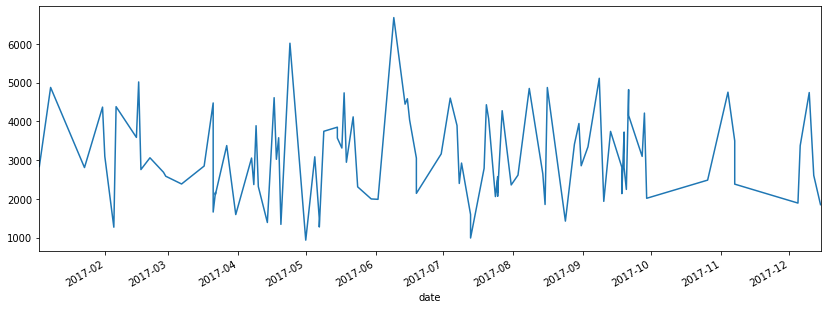

In [0]:
receipts_df['amount'].plot(figsize=(14,5))